# Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/phone search.csv")
df

,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,product_availability,climate_pledge_friendly,sales_volume,delivery,has_variations,unit_price,unit_count,coupon_text
0,B0BQ118F2T,Moto G Play 2023 3-Day Battery Unlocked Made f...,$99.00,$169.99,USD,4.0,1319,16,$69.88,False,False,True,Only 1 left in stock - order soon.,False,4K+ bought in past month,"FREE delivery Tue, Sep 24 Only 1 left in stock...",False,NaN,NaN,NaN
1,B0CV2W1TKZ,"Samsung Galaxy A15 (SM-155M/DSN), 128GB 6GB RA...",$153.99,NaN,USD,4.2,186,4,$147.50,False,False,True,NaN,False,1K+ bought in past month,"FREE delivery Tue, Sep 24",False,NaN,NaN,NaN
2,B09SM24S8C,"Samsung Galaxy A03s Cell Phone, AT&amp;T GSM U...",$69.00,$99.99,USD,3.8,597,35,$64.99,False,False,True,NaN,False,2K+ bought in past month,"FREE delivery Tue, Sep 24",True,NaN,NaN,NaN
3,B0CHH1N9VY,TracFone | Motorola Moto g Pure | Locked | 32G...,$49.99,NaN,USD,4.2,2814,3,$43.99,False,False,True,NaN,False,500+ bought in past month,"FREE delivery Tue, Sep 24",False,NaN,NaN,NaN
4,B09T3MQSVP,"Samsung Galaxy A13 5G Cell Phone, AT&amp;T GSM...",$88.09,$98.27,USD,3.8,1338,31,$70.40,False,False,True,NaN,False,500+ bought in past month,"FREE delivery Mon, Sep 30",False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,B0CZ3YPSRX,"Gimbal Stabilizer for Smartphone, 3-Axis Phone...",$99.99,NaN,USD,4.7,8,1,$99.99,False,False,True,NaN,False,NaN,"FREE delivery Thu, Sep 26",False,NaN,NaN,Save 50% with coupon
336,B0CHB24KQJ,[True Military-Grade] Car Phone Holder【2024 St...,$39.99,$45.99,USD,4.4,2589,1,$39.99,False,False,True,NaN,False,50+ bought in past month,"FREE delivery Tue, Sep 24",False,NaN,NaN,NaN
337,B01LXOPZ4W,Wall Mount Cell Phone Charging Shelf | Multi-D...,$273.00,NaN,USD,4.1,45,1,$273.00,False,False,False,NaN,False,NaN,FREE delivery Sep 25 - 30,False,NaN,NaN,NaN
338,B0CXPJK7F7,"Sensyne 92&quot; Cell Phone Tripod, Selfie Sti...",$29.99,NaN,USD,4.6,29066,1,$29.99,True,False,True,NaN,False,300+ bought in past month,"FREE delivery Tue, Sep 24 on $35 of items ship...",False,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         340 non-null    object 
 1   product_title                340 non-null    object 
 2   product_price                336 non-null    object 
 3   product_original_price       148 non-null    object 
 4   currency                     336 non-null    object 
 5   product_star_rating          337 non-null    float64
 6   product_num_ratings          340 non-null    int64  
 7   product_num_offers           340 non-null    int64  
 8   product_minimum_offer_price  336 non-null    object 
 9   is_best_seller               340 non-null    bool   
 10  is_amazon_choice             340 non-null    bool   
 11  is_prime                     340 non-null    bool   
 12  product_availability         75 non-null     object 
 13  climate_pledge_frien

In [ ]:
df.dtypes

,0
asin,object
product_title,object
product_price,object
product_original_price,object
currency,object
product_star_rating,float64
product_num_ratings,int64
product_num_offers,int64
product_minimum_offer_price,object
is_best_seller,bool


In [ ]:
cols_to_clean = ['product_price', 'product_original_price', 'product_minimum_offer_price']
for col in cols_to_clean:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(r'[\$,]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.dtypes

,0
asin,object
product_title,object
product_price,float64
product_original_price,float64
currency,object
product_star_rating,float64
product_num_ratings,int64
product_num_offers,int64
product_minimum_offer_price,float64
is_best_seller,bool


In [ ]:
df.describe()

,product_price,product_original_price,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,unit_count
count,336.000000,148.000000,337.000000,340.000000,340.000000,336.000000,4.000000
mean,172.387768,238.589527,4.087537,2744.050000,8.426471,146.787143,3.500000
std,201.455675,286.515857,0.383544,7331.816833,10.798389,190.479132,1.732051
min,7.990000,15.800000,1.600000,0.000000,1.000000,7.990000,2.000000
25%,59.990000,83.422500,3.900000,135.250000,1.750000,44.252500,2.000000
50%,114.280000,146.470000,4.100000,503.500000,4.000000,84.995000,3.500000
75%,199.990000,287.242500,4.300000,1874.250000,11.000000,164.612500,5.000000
max,1614.990000,2019.990000,5.000000,64977.000000,83.000000,1583.650000,5.000000


In [ ]:
df.duplicated().sum()

np.int64(21)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns=["currency","product_availability","unit_price","unit_count","coupon_text"],inplace=True)

In [ ]:
df.columns

Index(['asin', 'product_title', 'product_price', 'product_original_price',
       'product_star_rating', 'product_num_ratings', 'product_num_offers',
       'product_minimum_offer_price', 'is_best_seller', 'is_amazon_choice',
       'is_prime', 'climate_pledge_friendly', 'sales_volume', 'delivery',
       'has_variations'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
asin,0
product_title,0
product_price,4
product_original_price,180
product_star_rating,3
product_num_ratings,0
product_num_offers,0
product_minimum_offer_price,4
is_best_seller,0
is_amazon_choice,0


In [ ]:
df[df["product_price"].isnull()][["product_price", "product_title"]]

,product_price,product_title
64,NaN,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp..."
112,NaN,OnePlus 7T 8GB RAM 128GB ROM US Model HD1905 F...
149,NaN,BLU Advance L5 | 2020 | Long Lasting Battery |...
225,NaN,"SAMSUNG Galaxy A53 5G A Series Cell Phone, Fac..."


In [ ]:
S24_empty = df[df["product_title"].str.startswith("SAMSUNG Galaxy S24", na=False)][["product_title", "product_price"]]
S24_empty

,product_title,product_price
32,"SAMSUNG Galaxy S24+ Plus Cell Phone, 256GB AI ...",798.00
64,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...",859.99
97,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...",859.99
194,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...",859.99
212,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...",859.99
316,SAMSUNG Galaxy S24 Ultra 5G S9280 Physical Dua...,993.90


In [ ]:
df.loc[
    (df["product_title"].str.contains("SAMSUNG Galaxy S24") & df["product_price"].isnull()),
    'product_price'
] = 859.99

In [ ]:
df[df["product_title"].str.contains("SAMSUNG Galaxy S24")][["product_title", "product_price"]]

,product_title,product_price
32,"SAMSUNG Galaxy S24+ Plus Cell Phone, 256GB AI ...",798.00
64,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...",859.99
97,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...",859.99
194,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...",859.99
212,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...",859.99
316,SAMSUNG Galaxy S24 Ultra 5G S9280 Physical Dua...,993.90


In [ ]:
One_Plus_Empty = df[df["product_title"].str.startswith("OnePlus", na=False)][["product_title", "product_price"]]
One_Plus_Empty

,product_title,product_price
13,OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...,249.990
77,"OnePlus 12R, 16GB RAM+256GB, Dual-SIM, US Fact...",549.990
102,"OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...",799.990
112,OnePlus 7T 8GB RAM 128GB ROM US Model HD1905 F...,470.121
164,OnePlus Nord N200 | 5G for T-Mobile U.S Versio...,74.000
181,"OnePlus 9 Winter Mist, 5G Unlocked Android Sma...",188.890
197,"OnePlus Open, 16GB RAM+512GB, Dual-SIM, Voyage...",1299.990
320,"OnePlus Nord N10 5G Unlocked, Midnight Ice​, 6...",128.000


In [ ]:
One_Plus_mean = One_Plus_Empty["product_price"].mean()
One_Plus_mean

np.float64(470.121375)

In [ ]:
df.loc[
    (df["product_title"].str.contains("OnePlus") & df["product_price"].isnull()),
    "product_price"
] = 470.121

In [ ]:
df[df["product_title"].str.contains("OnePlus")][["product_title", "product_price"]]

,product_title,product_price
13,OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...,249.990
77,"OnePlus 12R, 16GB RAM+256GB, Dual-SIM, US Fact...",549.990
102,"OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...",799.990
112,OnePlus 7T 8GB RAM 128GB ROM US Model HD1905 F...,470.121
164,OnePlus Nord N200 | 5G for T-Mobile U.S Versio...,74.000
181,"OnePlus 9 Winter Mist, 5G Unlocked Android Sma...",188.890
197,"OnePlus Open, 16GB RAM+512GB, Dual-SIM, Voyage...",1299.990
320,"OnePlus Nord N10 5G Unlocked, Midnight Ice​, 6...",128.000


In [ ]:
BLU_empty = df[df["product_title"].str.startswith("BLU", na=False)][["product_title", "product_price"]]
BLU_empty

,product_title,product_price
37,BLU G63 | 2023 | 3-Day Battery | Unlocked | 6....,89.99
149,BLU Advance L5 | 2020 | Long Lasting Battery |...,70.74
183,BLU C5 Max | Unlocked | 5.7” HD+ Display | 5MP...,54.99
224,BLU G73 | 2023 | 3-Day Battery | Unlocked | 6....,114.99
297,BLU Z5 -GSM Unlocked Dual Sim -Black,22.99


In [ ]:
BLU_mean = BLU_empty["product_price"].mean()
BLU_mean

np.float64(70.74)

In [ ]:
df.loc[
    (df["product_title"].str.contains("BLU") & df["product_price"].isnull()),
    "product_price"
] = 70.74

In [ ]:
A53_empty = df[df["product_title"].str.startswith("SAMSUNG Galaxy A", na=False)][["product_title", "product_price"]]
A53_empty

,product_title,product_price
12,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",199.99
45,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 256GB 8GB...",183.69
70,"SAMSUNG Galaxy A35 5G A Series Cell Phone, 128...",349.99
91,"SAMSUNG Galaxy A13 LTE, Factory Unlocked Smart...",89.55
94,"SAMSUNG Galaxy A05 (128GB, 4GB) 6.7&quot; Dual...",111.07
109,"SAMSUNG Galaxy A15 5G 128GB, 6.5&quot;, GSM Un...",159.99
110,"SAMSUNG Galaxy A25 5G A Series Cell Phone, 128...",249.99
125,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",162.50
215,SAMSUNG Galaxy A10e GSM Unlocked (not CDMA) 32...,69.00
225,"SAMSUNG Galaxy A53 5G A Series Cell Phone, Fac...",168.29


In [ ]:
SAMSUNG_A_mean = A53_empty["product_price"].mean()
SAMSUNG_A_mean

np.float64(168.2907692307692)

In [ ]:
df.loc[
    (df["product_title"].str.contains("SAMSUNG Galaxy A") & df["product_price"].isnull()),
    'product_price'
] = 168.290

In [ ]:
df[df["product_minimum_offer_price"].isnull()][["product_minimum_offer_price", "product_title"]]

,product_minimum_offer_price,product_title
64,NaN,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp..."
112,NaN,OnePlus 7T 8GB RAM 128GB ROM US Model HD1905 F...
149,NaN,BLU Advance L5 | 2020 | Long Lasting Battery |...
225,NaN,"SAMSUNG Galaxy A53 5G A Series Cell Phone, Fac..."


In [ ]:
S24_empty_min = df[df["product_title"].str.startswith("SAMSUNG Galaxy S24", na=False)][["product_title", "product_minimum_offer_price"]]
S24_empty_min

,product_title,product_minimum_offer_price
32,"SAMSUNG Galaxy S24+ Plus Cell Phone, 256GB AI ...",741.99
64,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...",724.02
97,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...",724.02
194,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...",859.99
212,"SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...",859.99
316,SAMSUNG Galaxy S24 Ultra 5G S9280 Physical Dua...,993.90


In [ ]:
df.loc[
    (df["product_title"].str.contains("SAMSUNG Galaxy S24") & df["product_minimum_offer_price"].isnull()),
    "product_minimum_offer_price"
] = 724.02

In [ ]:
One_Plus_Empty_min = df[df["product_title"].str.startswith("OnePlus", na=False)][["product_title", "product_minimum_offer_price"]]
One_Plus_Empty_min

,product_title,product_minimum_offer_price
13,OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...,209.280
77,"OnePlus 12R, 16GB RAM+256GB, Dual-SIM, US Fact...",493.110
102,"OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...",715.670
112,OnePlus 7T 8GB RAM 128GB ROM US Model HD1905 F...,419.274
164,OnePlus Nord N200 | 5G for T-Mobile U.S Versio...,70.000
181,"OnePlus 9 Winter Mist, 5G Unlocked Android Sma...",188.890
197,"OnePlus Open, 16GB RAM+512GB, Dual-SIM, Voyage...",1138.070
320,"OnePlus Nord N10 5G Unlocked, Midnight Ice​, 6...",119.900


In [ ]:
One_Plus_min_mean = One_Plus_Empty_min["product_minimum_offer_price"].mean()
One_Plus_min_mean

np.float64(419.27425)

In [ ]:
df.loc[
    (df["product_title"].str.contains("OnePlus") & df["product_minimum_offer_price"].isnull()),
    "product_minimum_offer_price"
] = 419.274

In [ ]:
BLU_empty_min = df[df["product_title"].str.startswith("BLU", na=False)][["product_title", "product_minimum_offer_price"]]
BLU_empty

,product_title,product_price
37,BLU G63 | 2023 | 3-Day Battery | Unlocked | 6....,89.99
149,BLU Advance L5 | 2020 | Long Lasting Battery |...,70.74
183,BLU C5 Max | Unlocked | 5.7” HD+ Display | 5MP...,54.99
224,BLU G73 | 2023 | 3-Day Battery | Unlocked | 6....,114.99
297,BLU Z5 -GSM Unlocked Dual Sim -Black,22.99


In [ ]:
BLU_empty_min_mean = BLU_empty_min["product_minimum_offer_price"].mean()
BLU_empty_min_mean

np.float64(46.9924)

In [ ]:
df.loc[
    (df["product_title"].str.contains("BLU") & df["product_minimum_offer_price"].isnull()),
    "product_minimum_offer_price"
] = 46.992

In [ ]:
A53_empty_min = df[df["product_title"].str.startswith("SAMSUNG Galaxy A", na=False)][["product_title", "product_minimum_offer_price"]]
A53_empty

,product_title,product_price
12,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",199.99
45,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 256GB 8GB...",183.69
70,"SAMSUNG Galaxy A35 5G A Series Cell Phone, 128...",349.99
91,"SAMSUNG Galaxy A13 LTE, Factory Unlocked Smart...",89.55
94,"SAMSUNG Galaxy A05 (128GB, 4GB) 6.7&quot; Dual...",111.07
109,"SAMSUNG Galaxy A15 5G 128GB, 6.5&quot;, GSM Un...",159.99
110,"SAMSUNG Galaxy A25 5G A Series Cell Phone, 128...",249.99
125,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",162.50
215,SAMSUNG Galaxy A10e GSM Unlocked (not CDMA) 32...,69.00
225,"SAMSUNG Galaxy A53 5G A Series Cell Phone, Fac...",168.29


In [ ]:
A53_empty_min_mean = A53_empty_min["product_minimum_offer_price"].mean()
A53_empty_min_mean

np.float64(135.49830769230772)

In [ ]:
df.loc[
    (df["product_title"].str.contains("SAMSUNG Galaxy A") & df["product_minimum_offer_price"].isnull()),
    "product_minimum_offer_price"
] = 135.498

In [ ]:
df.isnull().sum()

,0
asin,0
product_title,0
product_price,0
product_original_price,180
product_star_rating,3
product_num_ratings,0
product_num_offers,0
product_minimum_offer_price,0
is_best_seller,0
is_amazon_choice,0


In [ ]:
df["product_star_rating"] = df["product_star_rating"].fillna(df["product_star_rating"].mean())

In [ ]:
df["sales_volume"] = df["sales_volume"].fillna(df["sales_volume"].mode()[0])

In [ ]:
df["delivery"] = df["delivery"].fillna(df["delivery"].mode()[0])

In [ ]:
df.isnull().sum()

,0
asin,0
product_title,0
product_price,0
product_original_price,180
product_star_rating,0
product_num_ratings,0
product_num_offers,0
product_minimum_offer_price,0
is_best_seller,0
is_amazon_choice,0


In [ ]:
df["product_original_price"] = df["product_original_price"].fillna(df["product_price"])
df

,asin,product_title,product_price,product_original_price,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations
0,B0BQ118F2T,Moto G Play 2023 3-Day Battery Unlocked Made f...,99.00,169.99,4.0,1319,16,69.88,False,False,True,False,4000,"FREE delivery Tue, Sep 24 Only 1 left in stock...",False
1,B0CV2W1TKZ,"Samsung Galaxy A15 (SM-155M/DSN), 128GB 6GB RA...",153.99,153.99,4.2,186,4,147.50,False,False,True,False,1000,"FREE delivery Tue, Sep 24",False
2,B09SM24S8C,"Samsung Galaxy A03s Cell Phone, AT&amp;T GSM U...",69.00,99.99,3.8,597,35,64.99,False,False,True,False,2000,"FREE delivery Tue, Sep 24",True
3,B0CHH1N9VY,TracFone | Motorola Moto g Pure | Locked | 32G...,49.99,49.99,4.2,2814,3,43.99,False,False,True,False,500,"FREE delivery Tue, Sep 24",False
4,B09T3MQSVP,"Samsung Galaxy A13 5G Cell Phone, AT&amp;T GSM...",88.09,98.27,3.8,1338,31,70.40,False,False,True,False,500,"FREE delivery Mon, Sep 30",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,B0CZ3YPSRX,"Gimbal Stabilizer for Smartphone, 3-Axis Phone...",99.99,99.99,4.7,8,1,99.99,False,False,True,False,100,"FREE delivery Thu, Sep 26",False
336,B0CHB24KQJ,[True Military-Grade] Car Phone Holder【2024 St...,39.99,45.99,4.4,2589,1,39.99,False,False,True,False,50,"FREE delivery Tue, Sep 24",False
337,B01LXOPZ4W,Wall Mount Cell Phone Charging Shelf | Multi-D...,273.00,273.00,4.1,45,1,273.00,False,False,False,False,100,FREE delivery Sep 25 - 30,False
338,B0CXPJK7F7,"Sensyne 92&quot; Cell Phone Tripod, Selfie Sti...",29.99,29.99,4.6,29066,1,29.99,True,False,True,False,300,"FREE delivery Tue, Sep 24 on $35 of items ship...",False


In [ ]:
df.isnull().sum()

,0
asin,0
product_title,0
product_price,0
product_original_price,0
product_star_rating,0
product_num_ratings,0
product_num_offers,0
product_minimum_offer_price,0
is_best_seller,0
is_amazon_choice,0


In [ ]:
df.dtypes

,0
asin,object
product_title,object
product_price,float64
product_original_price,float64
product_star_rating,float64
product_num_ratings,int64
product_num_offers,int64
product_minimum_offer_price,float64
is_best_seller,bool
is_amazon_choice,bool


In [ ]:
df.columns

Index(['asin', 'product_title', 'product_price', 'product_original_price',
       'product_star_rating', 'product_num_ratings', 'product_num_offers',
       'product_minimum_offer_price', 'is_best_seller', 'is_amazon_choice',
       'is_prime', 'climate_pledge_friendly', 'sales_volume', 'delivery',
       'has_variations'],
      dtype='object')

In [ ]:
def clean_sales_volume(val):
    if isinstance(val, str):
        if "K+" in val:
            num = val.split("K+")[0]
            try:
                return int(float(num) * 1000)
            except:
                return None
        elif "+" in val:
            num = val.split("+")[0]
            try:
                return int(num)
            except:
                return None
        elif val.strip().lower() in ["more buying choices", "typical price:", "list:", "typical:", ""]:
            return None
    return None
df["sales_volume"] = df["sales_volume"].apply(clean_sales_volume)

avg_volume = df["sales_volume"].mean()

df["sales_volume"] = df["sales_volume"].fillna(avg_volume).astype(int)

print(df["sales_volume"].head(10))


0    4000
1    1000
2    2000
3     500
4     500
5    4000
6    2000
7     500
8    1000
9    1000
Name: sales_volume, dtype: int64


In [ ]:
mode_value = df["delivery"].mode()[0]
df["delivery"] = df["delivery"].fillna(mode_value)

In [ ]:
df.isnull().sum()

,0
asin,0
product_title,0
product_price,0
product_original_price,0
product_star_rating,0
product_num_ratings,0
product_num_offers,0
product_minimum_offer_price,0
is_best_seller,0
is_amazon_choice,0


In [ ]:
df.dtypes

,0
asin,object
product_title,object
product_price,float64
product_original_price,float64
product_star_rating,float64
product_num_ratings,int64
product_num_offers,int64
product_minimum_offer_price,float64
is_best_seller,bool
is_amazon_choice,bool


# Business Question

Question 1:
Do "Amazon's Choice" products achieve higher sales volume compared to others?

In [ ]:
choice_sales = df[df["is_amazon_choice"] == True]["sales_volume"]
non_choice_sales = df[df["is_amazon_choice"] == False]["sales_volume"]

mean_choice = np.mean(choice_sales)
mean_non_choice = np.mean(non_choice_sales)

print("Average Sales Volume - Amazon's Choice:", mean_choice)
print("Average Sales Volume - Non Amazon's Choice:", mean_non_choice)

Average Sales Volume - Amazon's Choice: 4000.0
Average Sales Volume - Non Amazon's Choice: 458.7861635220126


Question 2:
Do "Best Seller" products have more customer ratings than others?

In [ ]:
best_seller_ratings = df[df["is_best_seller"] == True]["product_num_ratings"]
non_best_seller_ratings = df[df["is_best_seller"] == False]["product_num_ratings"]

mean_best_seller = np.mean(best_seller_ratings)
mean_non_best = np.mean(non_best_seller_ratings)

print("Average Number of Ratings - Best Seller:", mean_best_seller)
print("Average Number of Ratings - Non Best Seller:", mean_non_best)

Average Number of Ratings - Best Seller: 27352.0
Average Number of Ratings - Non Best Seller: 2609.4321766561516


 Question 3:
Do Prime-eligible products generate higher sales volume?

In [ ]:
prime_sales = df[df["is_prime"] == True]["sales_volume"]
non_prime_sales = df[df["is_prime"] == False]["sales_volume"]

mean_prime = np.mean(prime_sales)
mean_non_prime = np.mean(non_prime_sales)

print("Average Sales Volume - Prime:", mean_prime)
print("Average Sales Volume - Non Prime:", mean_non_prime)

Average Sales Volume - Prime: 470.5800865800866
Average Sales Volume - Non Prime: 468.0681818181818


Question 4:
Is there a relationship between the number of offers and the sales volume?

In [ ]:
correlation = np.corrcoef(df['product_num_offers'], df['sales_volume'])[0, 1]
print("Correlation between Number of Offers and Sales Volume:", correlation)

Correlation between Number of Offers and Sales Volume: 0.23318487530068394


Question 5:
Do climate-friendly products sell at a higher average price than others?

In [ ]:
green_price = df[df['climate_pledge_friendly'] == True]['product_price']
non_green_price = df[df['climate_pledge_friendly'] == False]['product_price']

mean_green = np.mean(green_price)
mean_non_green = np.mean(non_green_price)

print("Average Price - Climate Friendly:", mean_green)
print("Average Price - Non Climate Friendly:", mean_non_green)

Average Price - Climate Friendly: 280.21373333333344
Average Price - Non Climate Friendly: 144.4063975409836


Question 6:
Do products with higher star ratings receive more sales volume?

In [ ]:
correlation = np.corrcoef(df["product_star_rating"], df["sales_volume"])[0, 1]
print("Correlation between Star Rating and Sales Volume:", correlation)

Correlation between Star Rating and Sales Volume: 0.02905306444760932


Question 7:
Do products with a price discount sell more than full-price products?

In [ ]:
df["has_discount"] = df["product_original_price"] > df["product_price"]

discounted_sales = df[df["has_discount"]]["sales_volume"]
non_discounted_sales = df[~df["has_discount"]]["sales_volume"]

mean_discounted = np.mean(discounted_sales)
mean_non_discounted = np.mean(non_discounted_sales)

print("Average Sales - Discounted Products:", mean_discounted)
print("Average Sales - Non-Discounted Products:", mean_non_discounted)

Average Sales - Discounted Products: 577.8992805755396
Average Sales - Non-Discounted Products: 386.47777777777776


Question 8:
Do products with more variations have higher sales?

In [ ]:
mean_with_variations = np.mean(df[df["has_variations"]]["sales_volume"])
mean_without_variations = np.mean(df[~df["has_variations"]]["sales_volume"])

print("Average Sales - With Variations:", mean_with_variations)
print("Average Sales - Without Variations:", mean_without_variations)

Average Sales - With Variations: 530.4021739130435
Average Sales - Without Variations: 445.3612334801762


Question 9:
Is there a relationship between minimum offer price and sales volume?

In [ ]:
correlation = np.corrcoef(df["product_minimum_offer_price"], df["sales_volume"])[0, 1]
print("Correlation between Minimum Offer Price and Sales Volume:", correlation)

Correlation between Minimum Offer Price and Sales Volume: -0.06973066154402295


Question 10:
Do products with higher number of customer ratings perform better in sales?

In [ ]:
correlation = np.corrcoef(df["product_num_ratings"], df["sales_volume"])[0, 1]
print("Correlation between Number of Ratings and Sales Volume:", correlation)

Correlation between Number of Ratings and Sales Volume: 0.16640294486439597


# Visuals

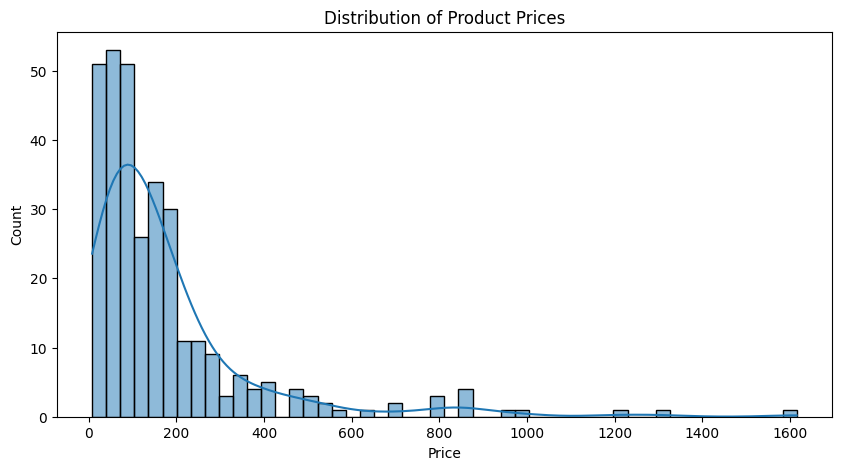

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["product_price"], bins=50, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

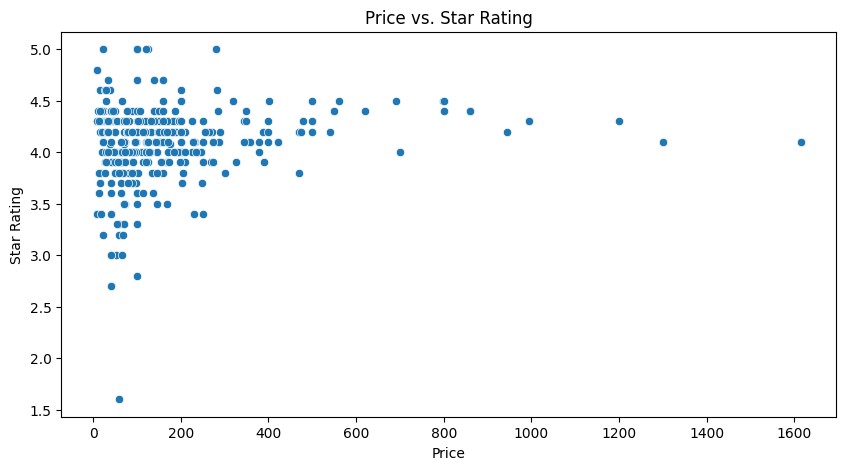

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="product_price", y="product_star_rating")
plt.title("Price vs. Star Rating")
plt.xlabel("Price")
plt.ylabel("Star Rating")
plt.show()

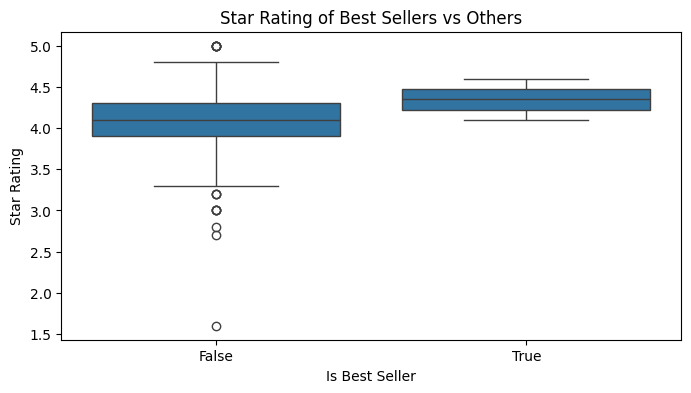

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="is_best_seller", y="product_star_rating")
plt.title("Star Rating of Best Sellers vs Others")
plt.xlabel("Is Best Seller")
plt.ylabel("Star Rating")
plt.show()

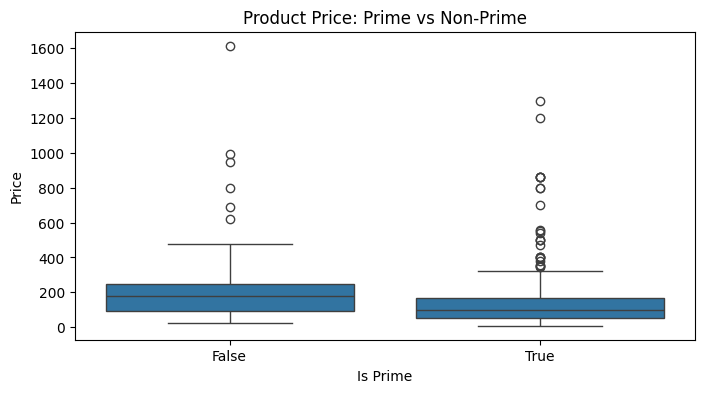

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="is_prime", y="product_price")
plt.title("Product Price: Prime vs Non-Prime")
plt.xlabel("Is Prime")
plt.ylabel("Price")
plt.show()

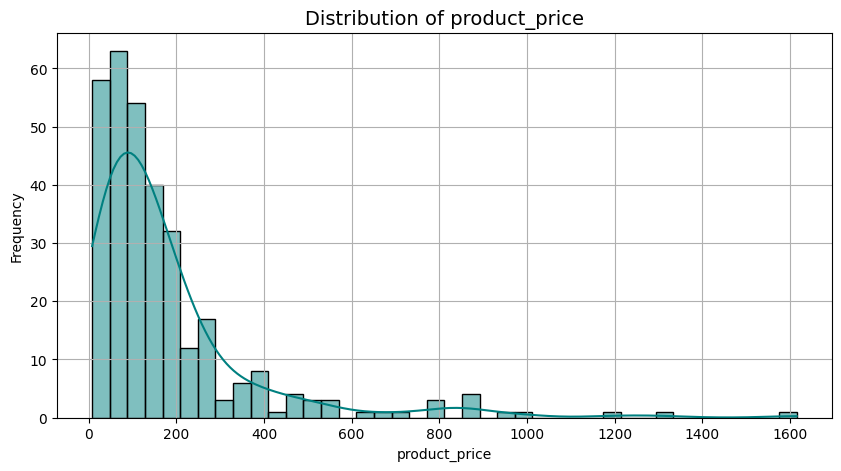

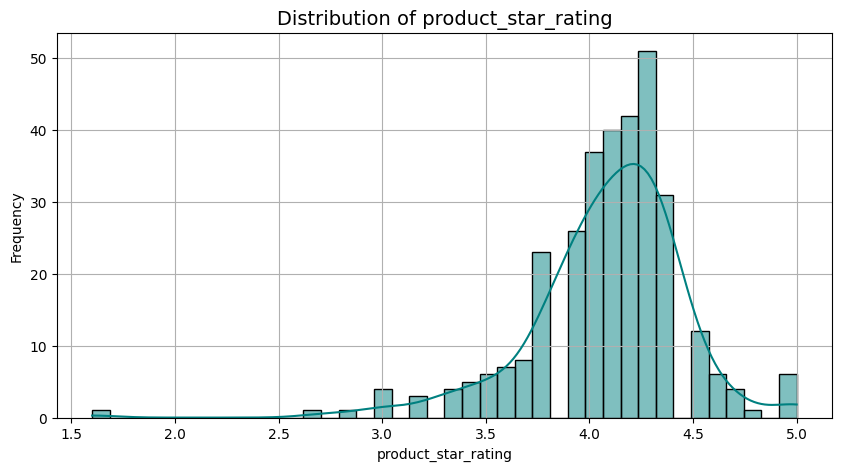

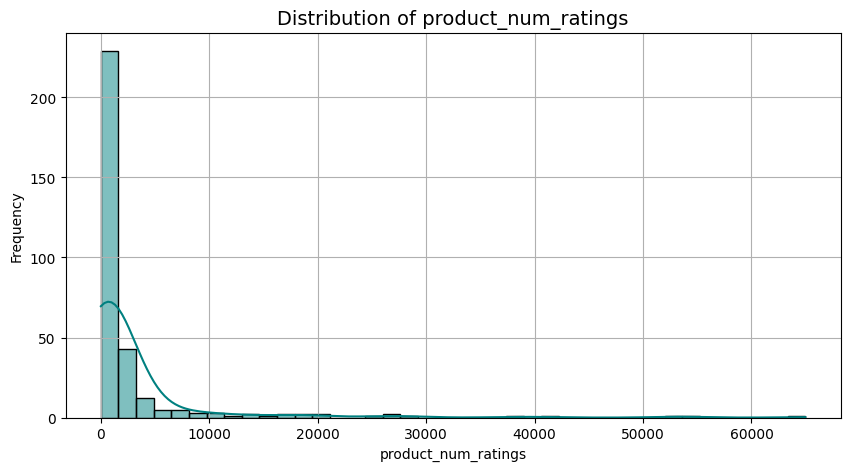

In [ ]:
num_cols = ["product_price", "product_star_rating", "product_num_ratings"]

for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=40, color="teal")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

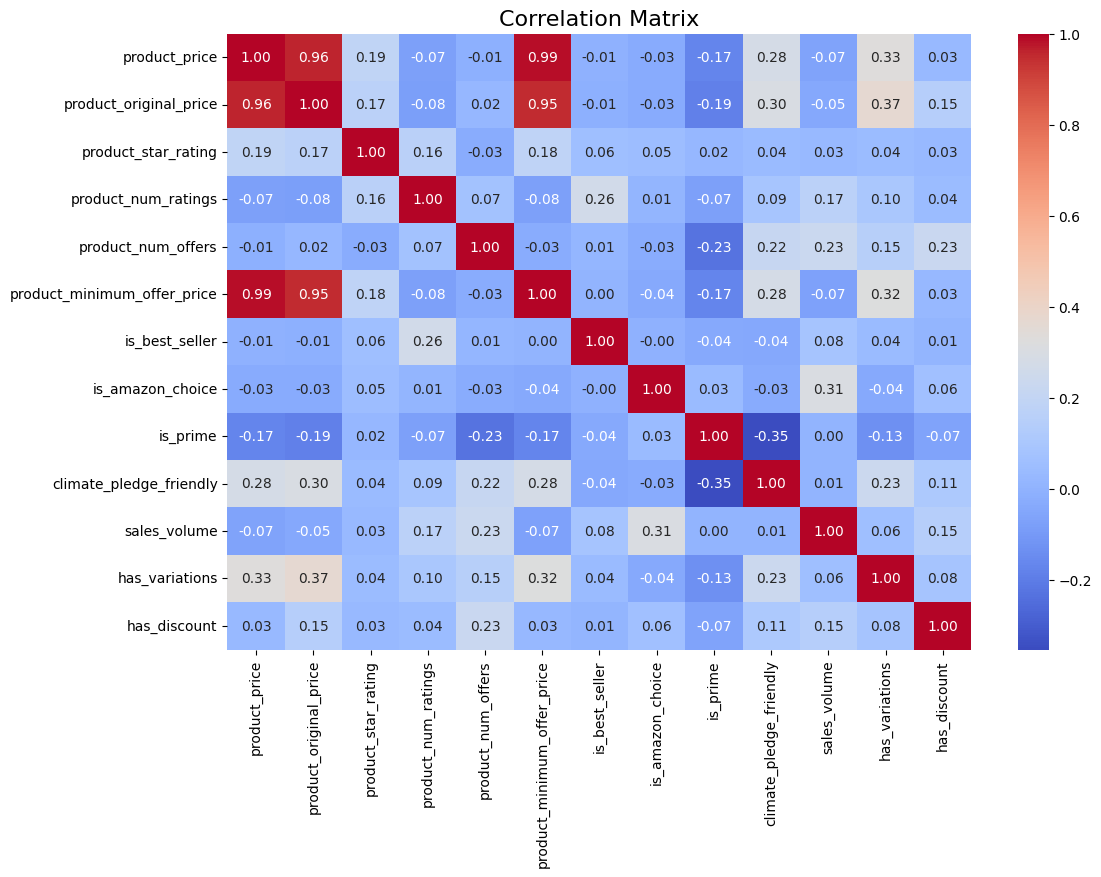

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

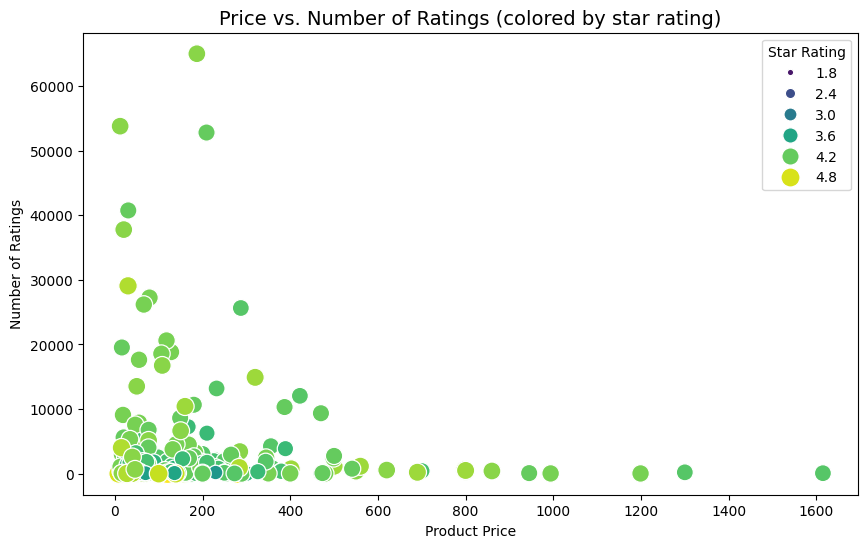

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="product_price", y="product_num_ratings", hue="product_star_rating", palette="viridis", size="product_star_rating", sizes=(10, 200))
plt.title("Price vs. Number of Ratings (colored by star rating)", fontsize=14)
plt.xlabel("Product Price")
plt.ylabel("Number of Ratings")
plt.legend(title='Star Rating')
plt.show()

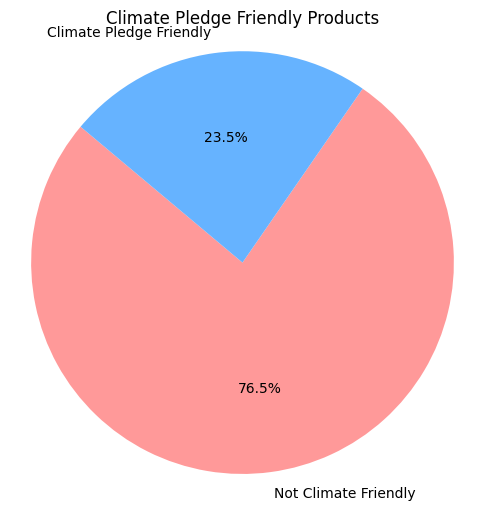

In [ ]:
labels = ["Not Climate Friendly", "Climate Pledge Friendly"]
sizes = df["climate_pledge_friendly"].value_counts().sort_index()
colors = ["#ff9999","#66b3ff"]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Climate Pledge Friendly Products")
plt.axis("equal")
plt.show()

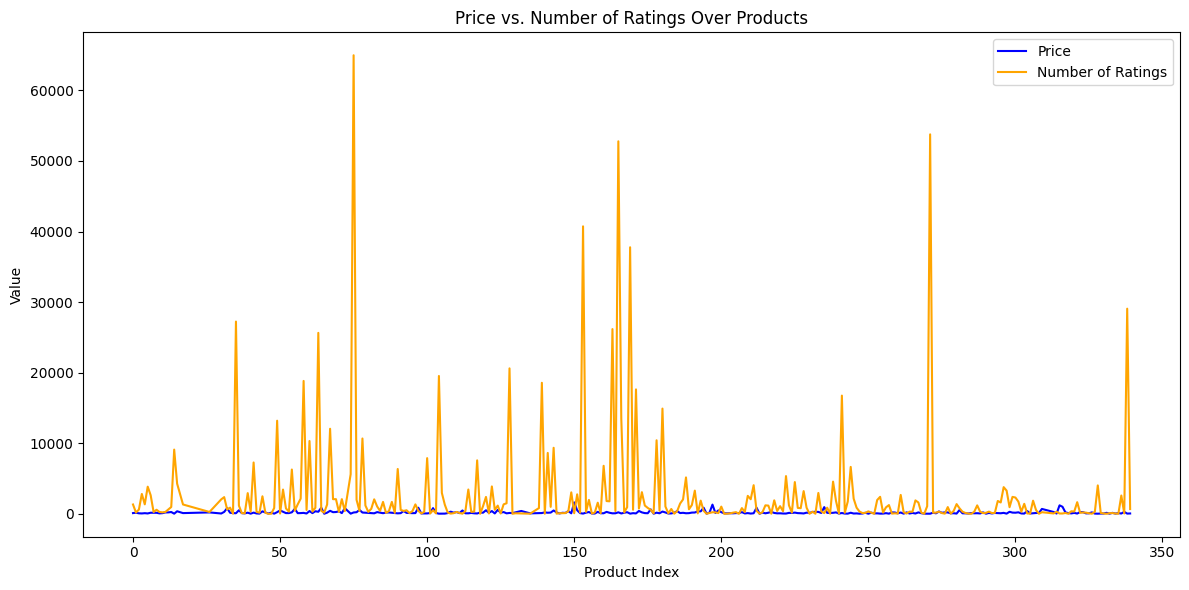

In [ ]:
df_sorted = df.sort_values(by="product_price")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sorted, x=df_sorted.index, y="product_price", label="Price", color="blue")
sns.lineplot(data=df_sorted, x=df_sorted.index, y="product_num_ratings", label="Number of Ratings", color="orange")
plt.title("Price vs. Number of Ratings Over Products")
plt.xlabel("Product Index")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("Phones_cleaned_data.csv", index=False)